<a href="https://colab.research.google.com/github/Ssergeymiss/Convers_.2.1/blob/main/Convers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ссылка на Объяснение модели**

https://docs.google.com/document/d/1vrSq69QX0HHE-VqtozwdRDpdn0UKTWUZZuknn0enzWE/edit?usp=sharing


**Чтобы произвести код, необходимо поочередно нажимать на кнопку проигрывателя (Слева от слов "Показать код")**

In [ ]:
#@title Загрузите необходимые библиотеки
!pip install mysql.connector
!pip install gdown

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from tensorflow import keras
import mysql.connector
import os
from datetime import date,timedelta,datetime
import urllib
import gdown

url= "https://drive.google.com/drive/folders/1zamYdBdTslR7iXL6-ciLsrL4gYtUA9Xb?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()



После загрузки необходимых библиотек, можно не возвращаться к этому Блоку и дальше вводить новый user_id

In [ ]:
#@title Введите user_id
user_id_initial=int(input())

In [61]:
#@title Загрузить данные по менеджеру


cnx = mysql.connector.connect(
    host="193.164.150.80",
    database='fedinst_office',
    user='user_view',
    password='vH56ui2GdKHQ7Em'
)

cursor = cnx.cursor()

query="select user_id, sumpay, reportdate from qq85_stthomeofficereport1 where user_id= "+ str(user_id_initial)
cursor.execute(query)


with open("report1.csv","w") as outfile:
    writer = csv.writer(outfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(col[0] for col in cursor.description)
    for row in cursor:
        writer.writerow(row)

query="select * from qq85_stthomeoffice_label where user_id= "+ str(user_id_initial)
cursor.execute(query)


with open("label.csv","w") as outfile:
    writer = csv.writer(outfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(col[0] for col in cursor.description)
    for row in cursor:
        writer.writerow(row)

In [ ]:
#@title Вывести график конверсии

report=pd.read_csv("report1.csv")
report=report[report.user_id==user_id_initial]
report=report.reset_index(drop=True)


today = datetime.today()
last_year=today-timedelta(days=365)


id_initial=last_year.strftime('%d-%m-%Y')
id_end=today.strftime('%d-%m-%Y')


report['reportdate'] =  pd.to_datetime(report['reportdate'], format='%d.%m.%Y')
report=report.loc[(report['reportdate'] >= id_initial)
                         & (report['reportdate'] < id_end)]




#print(report["reportdate"][0])
r_user_id=report["user_id"]
check_user=r_user_id.tolist()
r_data=report["reportdate"]



r_data=r_data.tolist()

import datetime as dt


month=[]
for i in report.reportdate:
  month.append(i.month)

report["month"]=month
report.tail()
report=report.reset_index(drop=True)



uniq=[]
for i in range(len(report)):
  if report.month[i] not in uniq:
    uniq.append(report.month[i])



convers=[]
for i in uniq:
  count=0
  r_count=0

  for j in range(len(report)):

    if i == report.month[j]:
      count+=1
      if report.sumpay[j]!=0:
        r_count+=1
  convers.append(r_count/count)


df=pd.DataFrame(columns=[["month","convers"]])
df["month"]=uniq
df["convers"]=convers


my_xticks = uniq
x = np.arange(1,len(df)+1)
y = convers
plt.xticks(x, my_xticks)
plt.plot(x, y)

In [ ]:
#@title Сформировать входные данные
report=pd.read_csv("report1.csv")

report['reportdate'] =  pd.to_datetime(report['reportdate'], format='%d.%m.%Y')



r_user_id=report["user_id"]
check_user=r_user_id.tolist()
r_data=report["reportdate"]

r_data=r_data.tolist()



today = datetime.today()
id_end=today
id_initial=today-timedelta(weeks=1)


id_initial=id_initial.strftime('%d-%m-%Y')
id_end=id_end.strftime('%d-%m-%Y')


report_all=report

report=report.loc[(report['reportdate'] >= id_initial)
                      & (report['reportdate'] < id_end)]

print("Сформировано записей: ",report.shape, report.head(),sep="\n")

report=report[report.user_id==user_id_initial]

report_all=report_all[report_all.user_id==user_id_initial]

r_user_id=report["user_id"]
all_user_id=report_all["user_id"]

r_unik_user=r_user_id.unique()
r_user_count=r_user_id.tolist()

all_unik_user=all_user_id.unique()
all_user_count=all_user_id.tolist()

r_Manager_df={}
all_Manager_df={}

for i in r_unik_user:

    r_Manager_df[i] = r_user_count.count(i)
r_ls = list(r_Manager_df.items())

for i in all_unik_user:

    all_Manager_df[i] = all_user_count.count(i)
all_ls = list(all_Manager_df.items())

df_M=pd.DataFrame(columns=["user_id","count"])
all_df_M=pd.DataFrame(columns=["user_id","count"])


for i in range(len(r_ls)):
    df_M.loc[i] = r_ls[i]# в этом датафрейме хранятся по колонкам идентификатор и количество заявок

for i in range(len(all_ls)):
    all_df_M.loc[i] = all_ls[i]# в этом датафрейме хранятся по колонкам идентификатор и количество заявок

report_top=report[report.sumpay != 0]
all_report_top=report_all[report_all.sumpay != 0]


top_user_id=report_top["user_id"]
t_unik_user=top_user_id.unique()
t_user_count=top_user_id.tolist()

all_top_user_id=all_report_top["user_id"]
all_t_unik_user=all_top_user_id.unique()
all_t_user_count=all_top_user_id.tolist()

t_Manager_df={}
all_t_Manager_df={}

for i in t_unik_user:

    t_Manager_df[i] = t_user_count.count(i)
t_ls = list(t_Manager_df.items())

t_df_M=pd.DataFrame(columns=["top_user_id","top_count"])


for i in range(len(t_ls)):
    t_df_M.loc[i] = t_ls[i]# в этом датафрейме хранятся по колонкам идентификатор и количество заявок

for i in all_t_unik_user:

    all_t_Manager_df[i] = all_t_user_count.count(i)
all_t_ls = list(all_t_Manager_df.items())

all_t_df_M=pd.DataFrame(columns=["top_user_id","top_count"])


for i in range(len(all_t_ls)):
    all_t_df_M.loc[i] = all_t_ls[i]# в этом датафрейме хранятся по колонкам идентификатор и количество заявок

all_t_df_M.head()


df_M=df_M.loc[df_M.user_id.isin(t_df_M.top_user_id)==True]

df_M=df_M.sort_values(by=["user_id"])
t_df_M=t_df_M.sort_values(by=["top_user_id"])

df_M = df_M.reset_index(drop=True)
top_count=t_df_M.top_count.tolist()

df_M["top_count"]=top_count

convers=[]

for i in range(len(df_M["user_id"])):
    convers.append(df_M["top_count"][i]/df_M["count"][i])# Считаем конверсию

df_M["convers"]=convers# Добавим столбец Конверсии в наш датафрейм

print()
print("Конверсия за последнюю неделю", df_M.head(), sep="\n")
print()
print()


all_df_M=all_df_M.loc[all_df_M.user_id.isin(all_t_df_M.top_user_id)==True]

all_df_M=all_df_M.sort_values(by=["user_id"])
all_t_df_M=all_t_df_M.sort_values(by=["top_user_id"])

all_df_M = all_df_M.reset_index(drop=True)
all_top_count=all_t_df_M.top_count.tolist()

all_df_M["top_count"]=all_top_count

all_convers=[]

for i in range(len(all_df_M["user_id"])):
    all_convers.append(all_df_M["top_count"][i]/all_df_M["count"][i])# Считаем конверсию

all_df_M["convers"]=all_convers# Добавим столбец Конверсии в наш датафрейм


label=pd.read_csv("label.csv")
label["created"]=pd.to_datetime(label["created"],unit='s')
label=label[label.created>id_initial]

label=label[label.created<id_end]
df_label = label[label.user_id == user_id_initial]

df_label = df_label.reset_index(drop=True)
telling=len(df_label)



# df_label=df_label[-telling:]
labels=[]
labels.append([df_label.loc[df_label['user_id'] == user_id_initial, 'label1'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label2'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label3'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label4'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label5'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label6'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label7'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label8'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label9'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label10'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label11'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label12'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label13'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label14'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label15'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label16'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label17'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label18'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label19'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label20'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label21'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label22'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label23'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label24'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label25'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label26'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label27'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label28'].mean(),
                df_label.loc[df_label['user_id'] == user_id_initial, 'label29'].mean(),
                ])
#for i in range((0,1)):#Добавим в список среднее значения всех лэйблов на менеджера





col=["label1","label2","label3",
      "label4","label5","label6","label7","label8","label9",
      'label10',"label11","label12","label13","label14","label15",
      "label16","label17","label18","label19",'label20',
      "label21","label22","label23",
      "label24","label25","label26","label27","label28","label29"]



Averange_M=pd.DataFrame(labels,columns=col)

#print("Усредненные значения меток за последнюю неделю ",Averange_M.head(), sep="\n")

print("Общая конверсия: ", all_convers)
print()



In [ ]:
#@title Начать прогнозирование

def load_model():
    model = keras.models.load_model("Architecture/model_Man_6.1.h5")
    model.load_weights("Architecture/Manager_weight_6.1.h5")
    if model:
        print("Модель загружена!")
    return model

def Preprocess_df(arr):
    print("Усредненные значения меток")


    arr = arr.astype(float)
    arr = arr.to_numpy()


    return arr

def print_predictions(preds):
    print(preds)



model = load_model()



result = True

import os
if result: #При нажатии на кнопку "Провести анализ" выполняется следующий код
    # Предварительная обработка массива
    x = Preprocess_df(Averange_M)
    # Распознавание изображения
    preds = model.predict(x)


    #st.write('**Конверсия, в этом месяце, предсказанная по последним ',+ telling,' разговорам:**')
    # Выводим результаты распознавания
    #print(preds)
    preds+=0.09
    print(preds)

    if all_convers>preds:

        print("Согласно анализу, проведенному по последним разговорам, конверсия менеджера в этом мясяце будет меньше общей на ",
                  (all_convers-preds))
    else:
        print("Согласно анализу, проведенному по последним разговорам, конверсия менеджера в этом мясяце будет больше общей на ",
                  (preds-all_convers))






**Объяснение влияния меток**

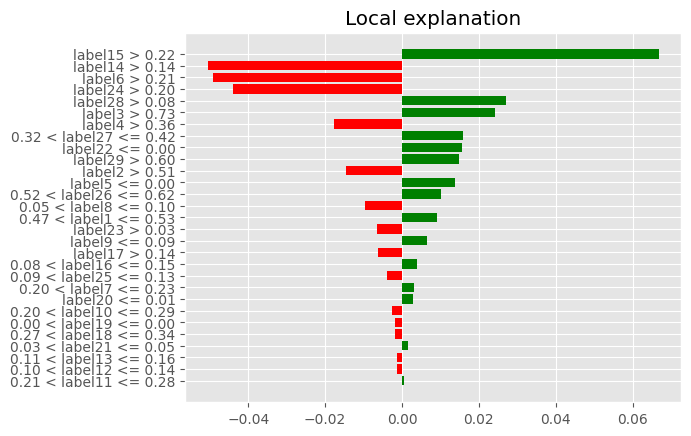